In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

In [4]:
df = pd.read_csv('/ocean/ksuchy/MOAD/observe/NPGO.csv', index_col=0,header=0)

In [5]:
df.index.name = "YEAR"
df = df.apply(pd.to_numeric) # convert all columns of DataFrame
#df = df[:-1]

In [25]:
df.loc[2007:2020]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Unnamed: 13,Unnamed: 14
YEAR,,,,,,,,,,,,,,
2007,-0.243309,-0.729927,-0.182149,0.384615,0.144928,1.230000,1.230000,1.430000,0.110011,1.270000,0.137363,0.218341,NaN,NaN
2008,0.179856,1.140000,1.370000,1.400000,1.740000,1.280000,1.430000,2.140000,2.230000,1.770000,1.970000,0.227273,NaN,NaN
2009,0.138313,0.110011,0.302115,0.240385,0.180180,0.270270,0.178571,0.139276,0.102669,1.150000,1.050000,1.060000,NaN,NaN
2010,2.060000,1.840000,1.650000,1.180000,1.870000,1.240000,1.150000,1.080000,1.000000,1.610000,0.101215,0.128370,NaN,NaN
2011,0.310559,0.181818,1.200000,0.167785,1.390000,1.110000,1.040000,1.040000,1.330000,1.200000,0.267380,0.757576,NaN,NaN
2012,0.119904,0.115875,1.120000,1.930000,1.630000,1.940000,1.860000,1.730000,1.360000,1.870000,1.400000,1.200000,NaN,NaN
2013,1.230000,1.200000,0.155521,0.210084,0.117371,0.137552,0.221729,0.195312,0.256410,-0.680272,-0.124224,-1.450000,NaN,NaN
2014,-0.256410,-0.374532,-0.220264,-0.161812,0.440529,-0.239808,-0.746269,-0.183486,-0.128700,0.235849,0.320513,-0.280899,NaN,NaN
2015,-0.181488,-1.270000,-1.400000,-1.380000,-0.138889,-1.250000,-1.470000,-1.930000,-2.100000,-1.310000,-2.250000,-1.110000,NaN,NaN


In [26]:
df.keys()

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [27]:
df = df.drop(columns=['Unnamed: 13', 'Unnamed: 14'])

In [28]:
NPGO = df.loc[2007:2020].to_numpy().flatten()

In [29]:
df2 = pd.read_csv('/ocean/ksuchy/MOAD/observe/CentralSoG_0-10mNitrateAnomalies.csv', index_col=0)

#df2 = pd.read_csv('/ocean/ksuchy/MOAD/observe/CentralSoG_NitrateAnomalies.csv', index_col=0)

In [30]:
df2.index.name = "YEAR"
df2 = df2.apply(pd.to_numeric) # convert all columns of DataFrame


In [31]:
df2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
YEAR,,,,,,,,,,,,
2007,0.568147,1.051579,2.377032,2.414698,0.237077,0.132123,1.528375,-0.668343,-0.697072,1.511975,0.743682,1.161057
2008,1.276618,0.479209,1.319208,-1.097002,1.878009,0.518437,0.618601,2.267914,2.672396,-1.678422,0.497572,0.403591
2009,0.779868,0.430057,2.087796,4.853228,1.664037,0.246908,0.905363,0.360774,-1.045085,0.595109,2.490391,1.573691
2010,1.034209,1.255441,1.802995,3.074134,1.325453,0.726371,0.762110,1.089319,0.088487,1.137430,0.201821,0.694923
2011,0.560476,0.772615,2.546247,9.392093,0.847004,-0.471765,-0.582232,-0.948415,0.565439,-0.134362,-0.006921,0.394563
2012,0.789796,1.147739,3.256987,4.216038,0.147361,0.936165,-0.418391,-0.520689,-2.380251,0.515971,0.416087,1.410105
2013,0.216742,0.035722,0.997229,-2.721693,0.434487,0.117015,0.132615,0.691013,1.132842,0.705337,-0.054270,-0.598873
2014,-0.168980,0.088505,-0.472435,-2.550886,-1.914227,-0.344112,-0.414754,-0.995434,-2.113837,-0.514631,-1.249320,-1.407372
2015,-2.075749,-1.507267,-6.402064,-5.363631,-0.790012,0.466801,1.025258,2.547623,4.371997,0.614517,-0.078646,0.494163


In [32]:
Nitrate_Anom=df2.to_numpy().flatten()

In [33]:
Nitrate_Anom

array([ 5.68146998e-01,  1.05157894e+00,  2.37703222e+00,  2.41469847e+00,
        2.37076790e-01,  1.32123051e-01,  1.52837541e+00, -6.68342631e-01,
       -6.97071613e-01,  1.51197457e+00,  7.43681864e-01,  1.16105666e+00,
        1.27661808e+00,  4.79209169e-01,  1.31920849e+00, -1.09700244e+00,
        1.87800895e+00,  5.18436663e-01,  6.18600847e-01,  2.26791377e+00,
        2.67239635e+00, -1.67842230e+00,  4.97571606e-01,  4.03590932e-01,
        7.79868031e-01,  4.30057381e-01,  2.08779567e+00,  4.85322797e+00,
        1.66403734e+00,  2.46908417e-01,  9.05363427e-01,  3.60774480e-01,
       -1.04508507e+00,  5.95108725e-01,  2.49039109e+00,  1.57369104e+00,
        1.03420928e+00,  1.25544086e+00,  1.80299535e+00,  3.07413424e+00,
        1.32545266e+00,  7.26370614e-01,  7.62110383e-01,  1.08931918e+00,
        8.84867780e-02,  1.13742996e+00,  2.01821384e-01,  6.94922968e-01,
        5.60475691e-01,  7.72615336e-01,  2.54624739e+00,  9.39209283e+00,
        8.47004141e-01, -

In [34]:
Nitrate_Anom.max()

9.392092825

In [35]:
date = []
for year in range(2007, 2021):
    for month in range(1, 13):
        index = df.index == str(year)
        date.append(datetime(year, month, 1))
        
        

date = np.array(date)
#NPGO = df.loc[2007:2020].to_numpy().flatten()
#Nitrate_Anom = df2.to_numpy().flatten()

In [36]:
print(len(NPGO))
print(len(Nitrate_Anom))
print(len(date))

168
168
168


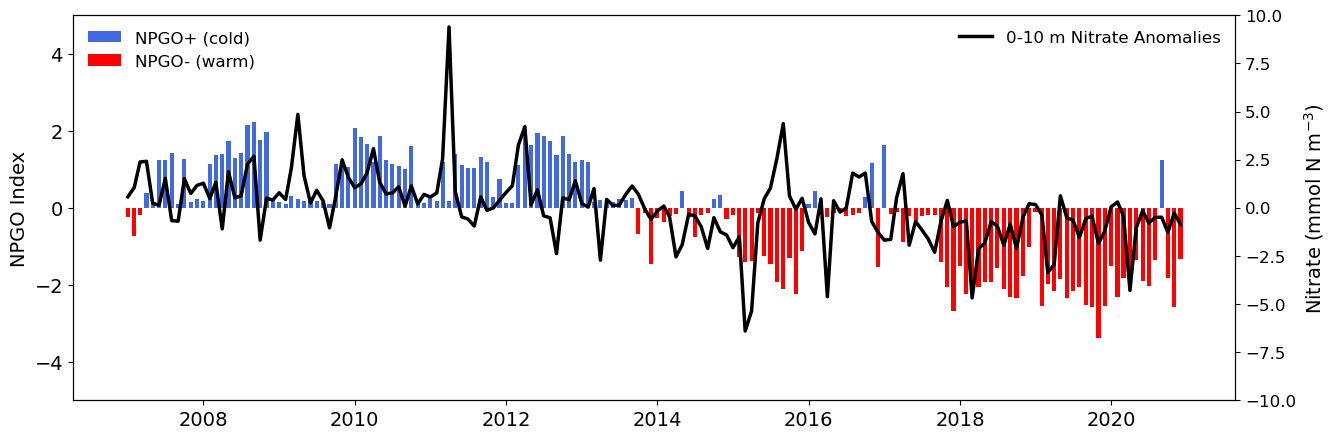

In [39]:
fig, ax1 = plt.subplots(figsize=(15, 5))

ax2 = ax1.twinx()

ax1.bar(date[NPGO>0], NPGO[NPGO>0], width=20, color='royalblue',label='NPGO+ (cold)')
ax1.bar(date[NPGO<0], NPGO[NPGO<0], width=20, color='r',label='NPGO- (warm)')
ax1.set_ylim(-5,5)
ax2.set_ylim(-10,10)
ax2.plot(date,Nitrate_Anom,color='k',linewidth=2.5,label='0-10 m Nitrate Anomalies')
ax1.set_title('',fontsize=18)
ax1.set_ylabel('NPGO Index',fontsize=14)
ax2.set_ylabel('Nitrate (mmol N m$^{-3}$)',fontsize=14)
ax1.legend(frameon=False,loc=2,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

#plt.savefig('SuppFigureS4_revised.png', bbox_inches='tight',dpi=1000,transparent=False)